<a href="https://colab.research.google.com/github/patelp12/DataScienceCommittee/blob/main/Titanic_did_autogluon_thing_here.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Top

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), cool 2D arrays
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
!pip install tensorflow_decision_forests #turn on or off if it's already downloaded
!pip install autogluon
import tensorflow_decision_forests as tfdf
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from autogluon.tabular import TabularPredictor
import pandas as pd


# how to use google drive #
drive.mount('/content/drive')      #attaches itself to your google drive

# takes the training data spreadsheet (csv) and puts it into two panda arrays #
trainData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
testData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')


names = ["RandomForest200",
         "LinearSVC",
         "MultinomialNB",
         "Logistic",
         "KNN5",
         "SVCLinear",
         "SVCgamma2",
         "DecisionTree5",
         #"RandomForest5-10",
         #"MLP-2000-1000-500-100",
         "AdaBoost",
         "HistGradientBoost",
         "GradientBoosting",  # New model
         "Bagging"            # New model
        ]


abrevNames = ["RF2",
         "LSVC",
         "MNB",
         "Log",
         "KNN5",
         "SVCL",
         "SVCg",
         "DT5",
         #"RF51",
         #"MLP",
         "AB",
         "HGB",
         "GB",    # New model
         "Bag"    # New model
        ]

models = [
        RandomForestClassifier(n_estimators=1000, max_depth=7, random_state=0),
        LinearSVC(max_iter=750, dual=True),
        MultinomialNB(),
        LogisticRegression(random_state=5),
        KNeighborsClassifier(n_neighbors=6, weights="uniform"),
        SVC(kernel="linear", C=2.2),
        SVC(gamma=0.34, C=2),
        DecisionTreeClassifier(max_depth=15),
        #RandomForestClassifier(n_estimators=750, max_depth=7, max_features=3),
        #MLPClassifier(hidden_layer_sizes=(2000,1000,500,100)),
        #MLPClassifier(hidden_layer_sizes=(100,50,10)),
        AdaBoostClassifier(),
        HistGradientBoostingClassifier(categorical_features=[]),
        GradientBoostingClassifier(n_estimators=300, max_depth=3, learning_rate=.1),  # New model
        BaggingClassifier(n_estimators=300)            # New model
    ]

"""The funtions bellow act on the data"""
# just prints the data
def printData():
  pd.set_option("display.max_rows", 10)
  print(f"Train data=\n{trainData}")
  print(f"Test data=\n{testData}")

# makes the column Family column which is the sum of Sibsp (siblingings/spouses) and Parch (Parens/Children)
def family():
  trainData["Family"] = trainData["SibSp"] + trainData["Parch"]
  testData["Family"] = testData["SibSp"] + testData["Parch"]

  print("   Created 'Family' column.")


# makes the column Last Name column which is just the peroson last name
def lastName():
  trainData["LastName"] = trainData["Name"].str.split(',').str[0]
  testData["LastName"] = testData["Name"].str.split(',').str[0]

  print("   Created 'LastName' column.")

# This is a function
def makeFamCodes():
  trainNameSet = set(trainData["LastName"])
  testNameSet = set(testData["LastName"])

  print(f"THIS IS MY SET {trainNameSet}")

  trainData["FamCode"] = 0
  testData["FamCode"] = 0

  i = 0
  for name in trainNameSet:
    trainData["FamCode"] += trainData["LastName"].apply(lambda s: i if s == name else 0)

    i = i + 1

  i = 0
  for name in testNameSet:
    testData["FamCode"] += testData["LastName"].apply(lambda s: i if s == name else 0)

    i = i + 1

def gloun():
  label = 'Cabin'
  labe1 = 'Ticket'
  label = 'Fair'
  label = 'SibSp'
  label = 'Age'
  label = 'Parch'

  predictor = TabularPredictor(label=label, path='autogluon_models').fit(data)

  test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
  y_test = test_data[label]  # Actual labels
  test_data_nolab = test_data.drop(labels=[label], axis=1)  # Remove the label column to make predictions

  predictions = predictor.predict(test_data_nolab)

  est_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
  y_test = test_data[label]  # Actual labels
  test_data_nolab = test_data.drop(labels=[label], axis=1)  # Remove the label column to make predictions

  predictions = predictor.predict(test_data_nolab)





# FILLING in NULLS #
#Takes all the nulls and puts in the mean/average of the col
def wrangleQ0():
# Extract numerical part from "Cabin" column
  trainData['Cabin'] = trainData['Cabin'].str.extract('(\d+)')
  testData['Cabin'] = testData['Cabin'].str.extract('(\d+)')

# Convert numerical part to numeric type
  trainData['Cabin'] = pd.to_numeric(trainData['Cabin'], errors='coerce')
  testData['Cabin'] = pd.to_numeric(testData['Cabin'], errors='coerce')

# Replace missing values in "Cabin" with mean
  trainData['Cabin'].fillna(trainData['Cabin'].mean(), inplace=True)
  testData['Cabin'].fillna(testData['Cabin'].mean(), inplace=True)

# Extract numerical part from "Ticket" column
  trainData['Ticket'] = trainData['Ticket'].str.extract('(\d+)')
  testData['Ticket'] = testData['Ticket'].str.extract('(\d+)')

# Convert numerical part to numeric type
  trainData['Ticket'] = pd.to_numeric(trainData['Ticket'], errors='coerce')
  testData['Ticket'] = pd.to_numeric(testData['Ticket'], errors='coerce')

# Replace missing values in "Ticket" with mean
  trainData['Ticket'].fillna(trainData['Ticket'].mean(), inplace=True)
  testData['Ticket'].fillna(testData['Ticket'].mean(), inplace=True)

  trainData["Age"] = trainData["Age"].fillna(trainData["Age"].mean())
  testData["Age"] = testData["Age"].fillna(testData["Age"].mean())

  trainData["Fare"] = trainData["Fare"].fillna(trainData["Fare"].mean())
  testData["Fare"] = testData["Fare"].fillna(testData["Fare"].mean())

  print("   Nulls Filled.")


# Remove rows with nulls in them #
def wrangleDelNull():
  trainData.dropna(inplace=True)
  testData.dropna(inplace=True)


# forces all numeric data to be withing 0 to 1
#has optional param that acccepts a list of columns to ignore
def wrangleNorm(exclude=[]):
  # change this to do all numeric columns!
  tempDF = testData.select_dtypes(include=np.number)
  columns = []

  # this is for if you want to exclude a ceetain column (feature)
  # it only adds colmuns that are not in th einclude list tot he columns list
  for col in tempDF.columns:
    if (col not in exclude):
      columns = columns + [col]

  #iterates through every numeric column
  for col in columns:
      trainData[col] = (trainData[col] - trainData[col].min()) / (trainData[col].max() - trainData[col].min())
      testData[col] = (testData[col] - testData[col].min()) / (testData[col].max() - testData[col].min())

  print("   Normalized numeric columns.")



"""The functions below display information about the data"""
# This predicts importance of our features #
def predictImportance():
    tfDataSet = tfdf.keras.pd_dataframe_to_tf_dataset(trainData, label='Survived')

    model = tfdf.keras.RandomForestModel()
    model.fit(tfDataSet)

    print(model.summary())


# displays correlation data give a training data set #
def displayCorrelations():
                                          #Correlation values
    print(f"\nCorrelation Summary:\nPearson Coef:{trainData.corr(method = 'pearson')}\n\nKendall Coef:{trainData.corr(method = 'kendall')}\n\nSpearman Coef:{trainData.corr(method = 'spearman')}\n")

    #big corrolation chart
    trainData.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
    plt.tight_layout(pad=2)
    plt.show()
    # histograms
    trainData.hist()
    plt.tight_layout(pad=2)
    plt.show()
    # scatter plot matrix
    scatter_matrix(trainData)
    plt.tight_layout(pad=.1)
    plt.show()


# This tests the models #
def testModels(features):
    print(f"\nTesting models based on: {features}")
    # what we want to predict #
    y = trainData["Survived"]

    # Change Categorical to numeric #
    X = pd.get_dummies(trainData[features])

    results = []

    i = 0
    for model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
        model_name = names[i]
        i = i + 1
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

    plt.boxplot(results, labels=abrevNames)
    plt.title('Algorithm Comparison')
    plt.show()


def outputPredictionsList(features):
    print(f"   Using Features: {features}")
    # what we want to predict #
    y = trainData["Survived"]

    # Change Categorical to numeric #
    X = pd.get_dummies(trainData[features])
    XTest = pd.get_dummies(testData[features])

    predictionsList = []

    for model in models:
        model.fit(X, y)
        prediction = model.predict(XTest)
        predictionsList.append(prediction)

    return np.array(predictionsList)

# Takes each models predictions for each person and takes the average to round to the most likely outcome
def outputConcensus(preditcionsList):
  print("   Making Concensus...")
  concensus = np.mean(predictionsList, axis=0)
  #print(concensus)
  return (np.rint(concensus)).astype(int)

# Create an output dataframe and write it to csv file #
def modelToCSV(prediction):
    output = pd.DataFrame({'PassengerId': testData.PassengerId, "Survived": prediction})
    output.to_csv('submission.csv', index=False)

    # just so we can see the submission in the console #
    submission = pd.read_csv('submission.csv')
    print(f"CSV submission conents:\n{submission}")

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Method Calls


Wrangling...
   Nulls Filled.
   Normalized numeric columns.

Creating Features...
   Created 'Family' column.
   Created 'LastName' column.
THIS IS MY SET {'Petroff', 'Walker', 'Meyer', 'Lindblom', 'Millet', 'Nicholson', 'Brewe', 'Jalsevac', 'Reed', "O'Connor", 'Mannion', 'Lewy', 'Cardeza', 'Butt', 'Duran y More', 'Endres', 'Leinonen', 'Ibrahim Shawah', 'Vanden Steen', 'Green', 'Hassab', 'Meek', 'Daly', 'Yrois', 'Abelson', 'Charters', 'Bjornstrom-Steffansson', 'Lindahl', 'Reeves', 'Staneff', 'Pekoniemi', 'Clarke', 'Gillespie', 'Ahlin', 'Hart', 'Frolicher-Stehli', 'Fahlstrom', 'Mallet', 'Nilsson', 'Vovk', 'Perreault', 'Hodges', 'Harmer', 'Hampe', 'Somerton', 'Matthews', 'Fynney', 'Andrews', 'Osen', 'Williams-Lambert', 'Wiklund', 'Garside', 'Banfield', 'Moor', 'Harrison', 'Moss', 'Trout', 'Keane', 'Todoroff', 'Youseff', 'Sharp', 'Nirva', 'Calderhead', 'Hale', 'Connors', 'Laleff', 'Scanlan', 'Smith', 'Cherry', 'Danbom', 'Emir', 'Van Impe', 'Sivic', 'Slabenoff', 'Karlsson', 'Campbell', '

No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "autogluon_models"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       11.25 GB / 12.67 GB (88.8%)
Disk Space Avail:   70.71 GB /

Train data=
     PassengerId  Survived  Pclass  \
0              1         0     1.0   
1              2         1     0.0   
2              3         1     1.0   
3              4         1     0.0   
4              5         0     1.0   
..           ...       ...     ...   
886          887         0     0.5   
887          888         1     0.0   
888          889         0     1.0   
889          890         1     0.0   
890          891         0     1.0   

                                                    Name     Sex       Age  \
0                                Braund, Mr. Owen Harris    male  0.271174   
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  0.472229   
2                                 Heikkinen, Miss. Laina  female  0.321438   
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531   
4                               Allen, Mr. William Henry    male  0.434531   
..                                                   ...     ..

	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			Fitting DropDuplicatesFeatureGenerator...
		Fitting TextNgramFeatureGenerator...
			Fitting CountVectorizer for text features: ['Name']
			CountVectorizer fit with vocabulary size = 7
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', [])        : 2 | ['Age', 'Fare']
		('int', [])          : 4 | ['PassengerId', 'Survived', 'Pclass', 'SibSp']
		('object', [])       : 4 | ['Sex', 'Ticket', 'Cabin', 'Embarked']
		('o


Testing models based on: ['Sex', 'Fare', 'Age', 'SibSp', 'Parch']
RandomForest200: 0.820438 (0.023471)
LinearSVC: 0.784496 (0.022217)
MultinomialNB: 0.786743 (0.020230)
Logistic: 0.791231 (0.019734)
KNN5: 0.793516 (0.024478)
SVCLinear: 0.786743 (0.020230)
SVCgamma2: 0.791237 (0.016913)
DecisionTree5: 0.771044 (0.032052)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost: 0.801362 (0.027075)
HistGradientBoost: 0.805850 (0.019822)
GradientBoosting: 0.827180 (0.021556)
Bagging: 0.815925 (0.026043)


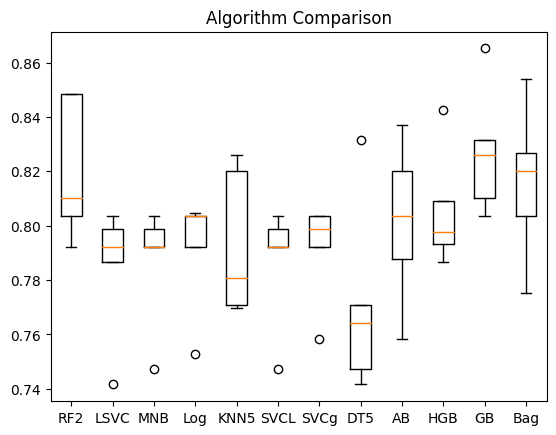


Predicting...
   Using Features: ['Sex', 'Fare', 'Age', 'Family', 'Pclass', 'Ticket', 'Cabin', 'Embarked', 'FamCode']


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


   Making Concensus...
CSV submission conents:
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [8]:
# METHOD CALLS #

#displayCorrelations(trainData)

""" WRANGLING """
print('\nWrangling...')
wrangleQ0()

#wrangleDelNull(trainData, testData)
wrangleNorm(exclude=["PassengerId"])
#printData()

""" FEATURE ENGINEERING """
print('\nCreating Features...')
family()
lastName()
makeFamCodes()
printData()
gloun()
# feature sets! #
features = ["Sex","Fare","Age","SibSp","Parch"]
features1 = ["Sex","Fare","Age","SibSp","Parch","Ticket","Embarked"]
features2 = ["Sex","Fare","Age","Family","Pclass","Ticket","Cabin","Embarked","FamCode"]
featuresALL = ["Sex","Fare","Age","Family","Pclass","Name","Ticket","Cabin","Embarked","PassengerId","FamCode"]

""" TESTING """
#predictImportance()
testModels(features)
#testModels(features1)
#testModels(features2)
#testModels(featuresALL)

""" For  predictiing & submitting """
print('\nPredicting...')
#prediction = outPrediction()
predictionsList = outputPredictionsList(features2)
#print(predictionsList)
concensus = outputConcensus(predictionsList)
#print(concensus)
modelToCSV(concensus)